# Random Forest 
About this notebook:

- Initial model built using the balanced dataset of 2,000 images representing 250 augmented images from each of the 8 classes.
- Using SkLearn RandomForestClassifier
- Note that random forest does not require pixel normalization. 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import augmentor
import constants

In [3]:
# Load Training augmented data for Count 250 
count = 250
path = constants.get_training_augmented_path_with_count_suffix(count=count)
aug = augmentor.Augmentor(dir_path=path)
aug.augment(count)

# Return all images in a np.Array 
x_train, y_train = aug.get_numpy_data()

# Load validation data in np.Array. To limit the num of images loaded pass limit=250
x_val, y_val  = constants.load_validation_split_data_with_labels(limit = 850, resize=(244,244))

# Load Test data in np.Array.  To limit the num of images loaded pass limit=250
x_test, y_test = constants.load_testing_split_data_with_labels(resize=(244,244))

Cleaning up isic_data/ISIC_2019_Training_Augmented_250
Start processing class: MELStart processing class: NV

Start processing class: BCC
Start processing class: AK
(NV) --> len(all_images)=9251, count=250, subsetting without augmentation.
(BCC) --> len(all_images)=2383, count=250, subsetting without augmentation.
(MEL) --> len(all_images)=3261, count=250, subsetting without augmentation.
(AK) --> len(all_images)=635, count=250, subsetting without augmentation.
(NV) --> Done with downsampling class NV.
Start processing class: BKL
(BKL) --> len(all_images)=1902, count=250, subsetting without augmentation.
(AK) --> Done with downsampling class AK.
Start processing class: DF
(DF) --> len(all_images)=178, count=250, augmenting up to required count.
(BCC) --> Done with downsampling class BCC.
Start processing class: VASC
(VASC) --> len(all_images)=185, count=250, augmenting up to required count.
(MEL) --> Done with downsampling class MEL.
Start processing class: SCC
(SCC) --> len(all_images

In [4]:
print("x_train.len=" + str(len(x_train)))
print("y_train.len=" + str(len(y_train)))

print("x_train.shape=" + str(x_train.shape))
print("y_train.shape=" + str(y_train.shape))

print("x_test.len=" + str(len(x_test)))
print("y_test.len=" + str(len(y_test)))

print("x_test.shape=" + str(x_test.shape))
print("y_test.shape=" + str(y_test.shape))

print("x_val.len=" + str(len(x_val)))
print("y_val.len=" + str(len(y_val)))

print("x_val.shape=" + str(x_val.shape))
print("y_val.shape=" + str(y_val.shape))

x_train.len=2000
y_train.len=2000
x_train.shape=(2000, 244, 244, 3)
y_train.shape=(2000, 8)
x_test.len=5066
y_test.len=5066
x_test.shape=(5066, 244, 244, 3)
y_test.shape=(5066, 1, 8)
x_val.len=850
y_val.len=850
x_val.shape=(850, 244, 244, 3)
y_val.shape=(850, 1, 8)


In [5]:
# Flatten to a single vector. x_train goes from (<Rows>, 244, 244, 3) to <Rows> x (244 * 244 * 3) 
x_train = x_train.reshape(x_train.shape[0], 244 * 244 * 3) 
x_val = x_val.reshape(x_val.shape[0], 244 * 244 * 3) 
x_test = x_test.reshape(x_test.shape[0], 244 * 244 * 3) 

# Flatten y
# nsamples, nx, ny = y_train.shape
# y_train = y_train.reshape((nsamples, nx*ny))

nsamples, nx, ny = y_val.shape
y_val = y_val.reshape((nsamples, nx*ny))

nsamples, nx, ny = y_test.shape
y_test = y_test.reshape((nsamples, nx*ny))


print("x_train.shape=" + str(x_train.shape))
print("y_train.shape=" + str(y_train.shape))
print("x_val.shape=" + str(x_val.shape))
print("y_val.shape=" + str(y_val.shape))
print("x_test.shape=" + str(x_test.shape))
print("y_test.shape=" + str(y_test.shape))

x_train.shape=(2000, 178608)
y_train.shape=(2000, 8)
x_val.shape=(850, 178608)
y_val.shape=(850, 8)
x_test.shape=(5066, 178608)
y_test.shape=(5066, 8)


In [6]:
#training random Forest; n_estimators set at default 100. 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
#Random Forest predictions
pred = random_forest.predict(x_val)
labels=["MEL", "NV", "BCC", "AK", "BKL", "DF", "VASC", "SCC"]
print ("Classification Report")
print(classification_report(y_val, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.04      0.08       161
           1       0.96      0.18      0.30       445
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        89
           5       0.00      0.00      0.00         5
           6       0.29      0.15      0.20        13
           7       0.00      0.00      0.00        18

   micro avg       0.86      0.10      0.19       850
   macro avg       0.24      0.05      0.07       850
weighted avg       0.64      0.10      0.18       850
 samples avg       0.10      0.10      0.10       850



/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Testing Accuracy')

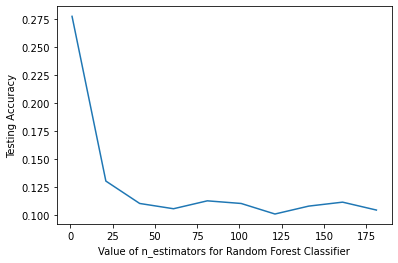

In [8]:
#Assessing performance of different n_estimators
#
scores =[]
for k in range(1, 200, 20):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_val)
    scores.append(accuracy_score(y_val, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200, 20), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [9]:
#observing significant drop in accuracy with increased estimators. Will try to find ideal number:

accuracy score:  0.23647058823529413 k: 1
accuracy score:  0.08352941176470588 k: 2
accuracy score:  0.1952941176470588 k: 3
accuracy score:  0.08588235294117647 k: 4
accuracy score:  0.1623529411764706 k: 5
accuracy score:  0.11058823529411765 k: 6
accuracy score:  0.1588235294117647 k: 7
accuracy score:  0.09647058823529411 k: 8
accuracy score:  0.15176470588235294 k: 9
accuracy score:  0.11647058823529412 k: 10
accuracy score:  0.12352941176470589 k: 11
accuracy score:  0.12352941176470589 k: 12
accuracy score:  0.13529411764705881 k: 13
accuracy score:  0.11058823529411765 k: 14
accuracy score:  0.13411764705882354 k: 15
accuracy score:  0.10588235294117647 k: 16
accuracy score:  0.12705882352941175 k: 17
accuracy score:  0.11764705882352941 k: 18
accuracy score:  0.13294117647058823 k: 19


Text(0.5, 1.0, 'Test Accuracy across n_estimator trials')

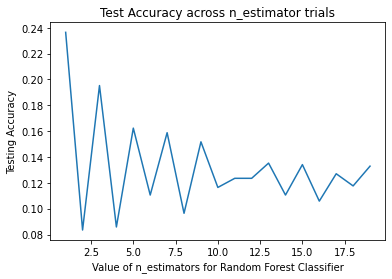

In [10]:
#Assessing performance of different n_estimators
#
scores =[]
for k in range(1, 20):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_val)
    scores.append(accuracy_score(y_val, y_pred))
    print('accuracy score: ', accuracy_score(y_val, y_pred), 'k:', k)

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 20), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.title('Test Accuracy across n_estimator trials')

In [11]:
print(scores)

[0.23647058823529413, 0.08352941176470588, 0.1952941176470588, 0.08588235294117647, 0.1623529411764706, 0.11058823529411765, 0.1588235294117647, 0.09647058823529411, 0.15176470588235294, 0.11647058823529412, 0.12352941176470589, 0.12352941176470589, 0.13529411764705881, 0.11058823529411765, 0.13411764705882354, 0.10588235294117647, 0.12705882352941175, 0.11764705882352941, 0.13294117647058823]


In [12]:
#Trying with 3 estimators: 
#training random Forest; n_estimators set at 3, based on above performance
random_forest_2 = RandomForestClassifier(n_estimators=3)
random_forest_2.fit(x_train, y_train)

pred_2 = random_forest_2.predict(x_val)
print ("Random Forest Classification Report")
print(classification_report(y_val, pred_2, labels=range(8), target_names=labels, digits = 3))
print("Accuracy: ", accuracy_score(y_val, pred_2))
#'ovr' Stands for One-vs-rest. Computes the AUC of each class against the rest
print("ROC AUC: ", roc_auc_score(y_val, pred_2, multi_class='ovr'))

Random Forest Classification Report
              precision    recall  f1-score   support

         MEL      0.435     0.186     0.261       161
          NV      0.865     0.245     0.382       445
         BCC      0.222     0.067     0.103        90
          AK      0.077     0.103     0.088        29
         BKL      0.143     0.079     0.101        89
          DF      0.057     0.400     0.100         5
        VASC      0.098     0.308     0.148        13
         SCC      0.057     0.111     0.075        18

   micro avg      0.387     0.192     0.256       850
   macro avg      0.244     0.187     0.157       850
weighted avg      0.579     0.192     0.278       850
 samples avg      0.192     0.192     0.192       850

Accuracy:  0.19176470588235295
ROC AUC:  0.5719173058916158


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#Predicting on test data using 2nd model with n_estimators = 3
pred_3 = random_forest_2.predict(x_test)
print ("Random Forest Classification Report")
print(classification_report(y_test, pred_3, labels=range(8), target_names=labels, digits = 3))
print("Accuracy: ", accuracy_score(y_test, pred_3))
#'ovr' Stands for One-vs-rest. Computes the AUC of each class against the rest
print("ROC AUC: ", roc_auc_score(y_test, pred_3, multi_class='ovr'))

Random Forest Classification Report
              precision    recall  f1-score   support

         MEL      0.336     0.164     0.221       895
          NV      0.832     0.281     0.420      2592
         BCC      0.295     0.094     0.142       684
          AK      0.132     0.169     0.148       160
         BKL      0.138     0.076     0.098       502
          DF      0.043     0.205     0.071        44
        VASC      0.062     0.319     0.105        47
         SCC      0.107     0.141     0.122       142

   micro avg      0.396     0.207     0.272      5066
   macro avg      0.243     0.181     0.166      5066
weighted avg      0.547     0.207     0.293      5066
 samples avg      0.207     0.207     0.207      5066

Accuracy:  0.20706671930517173
ROC AUC:  0.5672968987988957


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


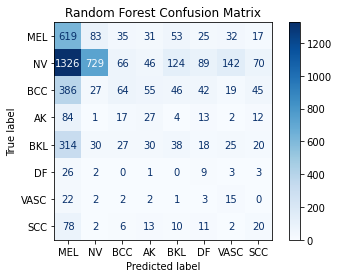

In [14]:
#Confusion matrix: 
cm = confusion_matrix(y_test.argmax(axis=1), pred_3.argmax(axis=1))
cm
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show(); 

### Appears that model is incorrectly predicting benign moles (N)V as melanoma. This is a poor performing model in this context as this would lead to a lot of false positives for patient biopsy. 